## Credit Card Fraud Detection with Deep Neural Network

In [1]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
# Random seeds
np.random.seed(2)

In [3]:
# Load the dataset
df_original = pd.read_csv("Downloads/creditcard.csv")
df_original.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Creating a copy of the original dataset
df = df_original.copy()
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


##### Data exploration

In [5]:
# General info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Statistical values including missing values
df.describe(include="all")

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# Checking NaN values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# Unique values into the "Class" feature
df["Class"].unique()

array([0, 1], dtype=int64)

In [9]:
# Counting values into the "Class" feature
df.Class.value_counts

<bound method IndexOpsMixin.value_counts of 0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64>

In [10]:
# Unique values into the "Amount" feature
df["Amount"].unique()

array([149.62,   2.69, 378.66, ..., 381.05, 337.54,  95.63])

In [11]:
# Counting values into the "Amount" feature
df.Amount.value_counts

<bound method IndexOpsMixin.value_counts of 0         149.62
1           2.69
2         378.66
3         123.50
4          69.99
           ...  
284802      0.77
284803     24.79
284804     67.88
284805     10.00
284806    217.00
Name: Amount, Length: 284807, dtype: float64>

#### Pre-processing

In [12]:
# Import library
from sklearn.preprocessing import StandardScaler

# Normalizing the "Amount" feature
df["normalizeAmount"] = StandardScaler().fit_transform(df["Amount"].values.reshape(-1, 1))
df = df.drop(["Amount"], axis=1)

# Checking the result
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizeAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [13]:
# Removing the "Time" feature
df = df.drop(["Time"], axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizeAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [14]:
# Definding X indipendent variables keeping all columns but skiping the coulumns "Class"
X = df.iloc[:, df.columns != "Class"]

# Definding y target variable as "Class" feature
y = df.iloc[:, df.columns == "Class"]

##### Train_Test_Split

In [15]:
# Import package
from sklearn.model_selection import train_test_split

# Train_Test_Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.30, random_state=0)

# Printing the shapes
print("X_train shape is: ", X_train.shape)
print("X_test shape is: ", X_test.shape)
print("y_train shape is: ", y_train.shape)
print("y_test shape is: ", y_test.shape)

X_train shape is:  (199364, 29)
X_test shape is:  (85443, 29)
y_train shape is:  (199364, 1)
y_test shape is:  (85443, 1)


In [16]:
# Storing in array
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

##### Deep Neural Network

In [17]:
# Import packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [18]:
# Definding the Model 
model = Sequential([
    Dense(units=16, input_dim=29, activation="relu"),
    Dense(units=24, activation="relu"),
    Dropout(0.5),
    Dense(units=20, activation="relu"),
    Dense(units=24, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [19]:
# Checking the result 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
______________________________________________________

##### Training 

In [20]:
# Metrics
model.compile(optimizer="adam", loss="binary_crossentropy", metrics = ["accuracy"])

# Fitting
model.fit(X_train, y_train, batch_size=15, epochs=5)

Train on 199364 samples
Epoch 1/5
199364/199364 [==============================] - 179s 900us/sample - loss: 0.0094 - accuracy: 0.9980
Epoch 2/5
199364/199364 [==============================] - 170s 853us/sample - loss: 0.0038 - accuracy: 0.9993
Epoch 3/5
199364/199364 [==============================] - 178s 895us/sample - loss: 0.0034 - accuracy: 0.9993
Epoch 4/5
199364/199364 [==============================] - 187s 936us/sample - loss: 0.0035 - accuracy: 0.9993
Epoch 5/5
199364/199364 [==============================] - 188s 945us/sample - loss: 0.0032 - accuracy: 0.9994


In [21]:
# Evaluating the test dataset
score = model.evaluate(X_test, y_test)

85443/85443 [==============================] - 22s 253us/sample - loss: 0.0035 - accuracy: 0.9994


In [22]:
# Printing the accuracy's result
print(score)

[0.0035326138696627003, 0.9994031]


##### Confusion Matrix

In [35]:
# Import packages
import itertools
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Definding the function for plotting Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [36]:
# Prediction
y_pred = model.predict(X_test)

# Transforming y_test dataset in pandas
y_test = pd.DataFrame(y_test)

In [37]:
# Definding Confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred.round())
print(cnf_matrix)

[[85274    22]
 [   29   118]]


Confusion matrix, without normalization
[[85274    22]
 [   29   118]]


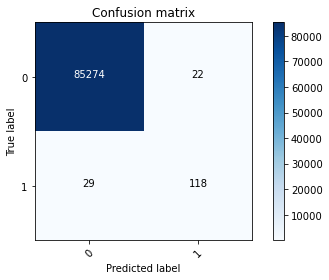

In [38]:
# Plotting Confusion Matrix by calling the function
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

[[284248     67]
 [   104    388]]
Confusion matrix, without normalization
[[284248     67]
 [   104    388]]


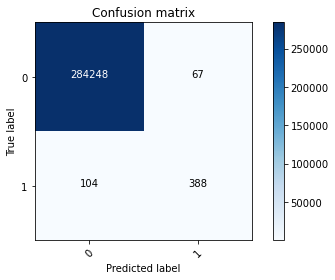

In [39]:
# Prediction & Confusion matrix with X & y parameters
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
print(cnf_matrix)
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

#### Random Forest

In [40]:
# Import package
from sklearn.ensemble import RandomForestClassifier

In [41]:
# Definding the Random Forest
random_forest = RandomForestClassifier(n_estimators=100)

In [46]:
# Transforming y_train dataset in pandas for fitting the model
y_train = pd.DataFrame(y_train) 

In [47]:
# Fitting the Random Forest model
random_forest.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

In [49]:
# Prediction Random Forest 
y_pred = random_forest.predict(X_test)

In [50]:
# Accuracy
random_forest.score(X_test, y_test)

0.9995084442259752

##### Confusion matrix

In [51]:
# Import packages
import itertools
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Definding the function for plotting Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

[[85290     6]
 [   36   111]]
Confusion matrix, without normalization
[[85290     6]
 [   36   111]]


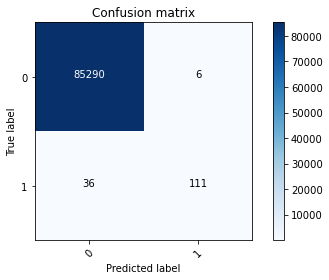

In [52]:
# Confusion Matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

[[284309      6]
 [    36    456]]
Confusion matrix, without normalization
[[284309      6]
 [    36    456]]


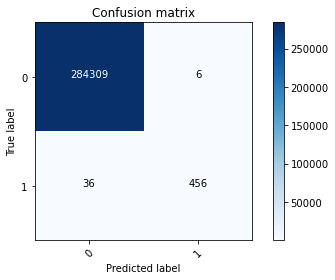

In [53]:
# Prediction X
y_pred = random_forest.predict(X)

# Confusion Matrix X
cnf_matrix = confusion_matrix(y, y_pred.round())
print(cnf_matrix)

# Plotting Confusion Matrix
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

##### Decision Tree

In [54]:
# Import package
from sklearn.tree import DecisionTreeClassifier

In [55]:
# Definding the Decision Tree model
decision_tree = DecisionTreeClassifier()

In [56]:
# Fitting the Decision Tree model
decision_tree.fit(X_train, y_train.values.ravel())

DecisionTreeClassifier()

In [57]:
# Prediction in Decision Tree 
y_pred = decision_tree.predict(X_test)

In [58]:
# Accuracy 
decision_tree.score(X_test, y_test)

0.9991807403766253

In [59]:
# Definding the function for plotting Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

[[85265    31]
 [   39   108]]
Confusion matrix, without normalization
[[85265    31]
 [   39   108]]


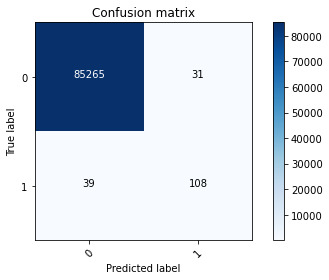

In [60]:
# Confusion Matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

# Plotting Confusion Matrix 
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

[[284284     31]
 [    39    453]]
Confusion matrix, without normalization
[[284284     31]
 [    39    453]]


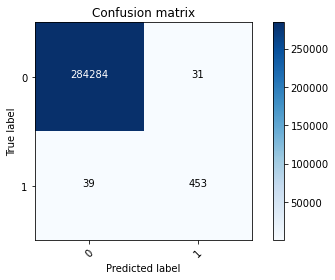

In [61]:
# Prediction Decision Tree with X & y parameters
y_pred = decision_tree.predict(X)
y_expected = pd.DataFrame(y)

# Confusion Matrix
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
print(cnf_matrix)

# Plotting Confusion Matrix
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

##### Undersampling

In [62]:
# Definding the Fraud records
fraud_indices = np.array(df[df.Class == 1].index)
number_records_fraud = len(fraud_indices)
print(number_records_fraud)

492


In [63]:
# Definding the Normal records
normal_indices = np.array(df[df.Class == 0].index)

In [64]:
# Creating a Random Sample
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)

# Converting into a Np Array
random_normal_indices = np.array(random_normal_indices)

# Cheching the number of Normal transactions
print(len(random_normal_indices))

492


In [66]:
# Creating the Undersampling array
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])

# Cheching the len
print(len(under_sample_indices))

984


In [67]:
# Creating the new dataset
under_sample_data = df.iloc[under_sample_indices, :]

In [69]:
# Definding X & y 
X_undersample = under_sample_data.iloc[:, under_sample_data.columns != "Class"]
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == "Class"]

In [71]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size=0.3)

# Printing the shapes
print("X_train shape is: ", X_train.shape)
print("X_test shape is: ", X_test.shape)
print("y_train shape is: ", y_train.shape)
print("y_test shape is: ", y_test.shape)

X_train shape is:  (688, 29)
X_test shape is:  (296, 29)
y_train shape is:  (688, 1)
y_test shape is:  (296, 1)


In [72]:
# Transforming from pandas to np.array
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [73]:
# Checking the result
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
______________________________________________________

In [74]:
# TRAINING

# Metrics
model.compile(optimizer="adam", loss="binary_crossentropy", metrics = ["accuracy"])

# Fitting
model.fit(X_train, y_train, batch_size=15, epochs=5)

Train on 688 samples
Epoch 1/5
688/688 [==============================] - 33s 48ms/sample - loss: 0.4580 - accuracy: 0.9041
Epoch 2/5
688/688 [==============================] - 1s 2ms/sample - loss: 0.1925 - accuracy: 0.9288
Epoch 3/5
688/688 [==============================] - 1s 1ms/sample - loss: 0.1547 - accuracy: 0.9331
Epoch 4/5
688/688 [==============================] - 1s 1ms/sample - loss: 0.1440 - accuracy: 0.9375
Epoch 5/5
688/688 [==============================] - 1s 1ms/sample - loss: 0.1337 - accuracy: 0.9419


[[152   0]
 [ 14 130]]
Confusion matrix, without normalization
[[152   0]
 [ 14 130]]


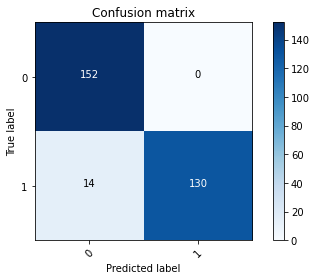

In [78]:
# Prediction with X_test & y_test parameters
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)

# Confusion Matrix
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
print(cnf_matrix)

# Plotting Confusion Matrix
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

[[283793    522]
 [    54    438]]
Confusion matrix, without normalization
[[283793    522]
 [    54    438]]


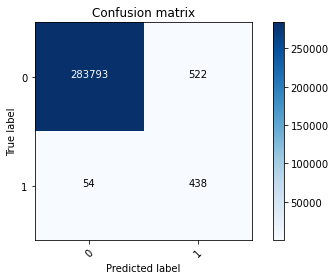

In [79]:
# Prediction into the intere dataset 
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)

# Confusion Matrix
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
print(cnf_matrix)

# Plotting Confusion Matrix
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

##### Smote

In [81]:
## bash
!pip install -U imbalanced-learn

In [82]:
# Import library
from imblearn.over_sampling import SMOTE

In [83]:
# Fitting the SMOTE
X_resample, y_resample = SMOTE().fit_sample(X,y.values.ravel())

In [84]:
# Transforming the parameters from np.array to pandas
X_resample = pd.DataFrame(X_resample)
X_resample = pd.DataFrame(X_resample)

In [85]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.3)

# Printing the shapes
print("X_train shape is: ", X_train.shape)
print("X_test shape is: ", X_test.shape)
print("y_train shape is: ", y_train.shape)
print("y_test shape is: ", y_test.shape)

X_train shape is:  (398041, 29)
X_test shape is:  (170589, 29)
y_train shape is:  (398041,)
y_test shape is:  (170589,)


In [86]:
# Transforming from pandas to np.array
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [87]:
# Checking the result
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
______________________________________________________

In [88]:
# TRAINING

# Metrics
model.compile(optimizer="adam", loss="binary_crossentropy", metrics = ["accuracy"])

# Fitting
model.fit(X_train, y_train, batch_size=15, epochs=5)

Train on 398041 samples
Epoch 1/5
398041/398041 [==============================] - 345s 866us/sample - loss: 0.0267 - accuracy: 0.9909
Epoch 2/5
398041/398041 [==============================] - 343s 862us/sample - loss: 0.0122 - accuracy: 0.9968
Epoch 3/5
398041/398041 [==============================] - 345s 866us/sample - loss: 0.0103 - accuracy: 0.9974
Epoch 4/5
398041/398041 [==============================] - 349s 877us/sample - loss: 0.0089 - accuracy: 0.9978
Epoch 5/5
398041/398041 [==============================] - 358s 900us/sample - loss: 0.0083 - accuracy: 0.9981


[[85071   318]
 [    4 85196]]
Confusion matrix, without normalization
[[85071   318]
 [    4 85196]]


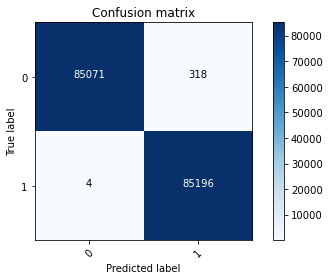

In [89]:
# Prediction with X_test & y_test parameters
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)

# Confusion Matrix
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
print(cnf_matrix)

# Plotting Confusion Matrix
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

[[283399    916]
 [     2    490]]
Confusion matrix, without normalization
[[283399    916]
 [     2    490]]


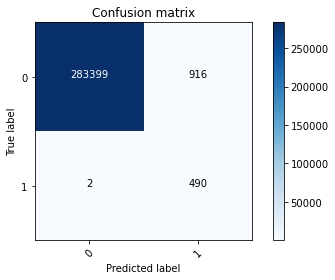

In [90]:
# Prediction with X_test & y_test parameters
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)

# Confusion Matrix
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
print(cnf_matrix)

# Plotting Confusion Matrix
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()